In [1]:
import io
from pathlib import Path 
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

figsize(8, 8)

In [2]:
datapath = Path("/media/hemu/Data/Markets/FX/truefx/GBPJPY-zip")



In [3]:
def read_and_parse_truefx(filepath):
    df = pd.read_csv(filepath, header=None, parse_dates=True)
    df.columns = ('asset', 'timestamp', 'bid', 'ask')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df.drop('asset', axis=1).set_index('timestamp')

In [4]:
files = list(datapath.iterdir())
print(len(files))

df = read_and_parse_truefx(files[0:20])

125


/home/hemu/miniconda3/envs/madigan/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


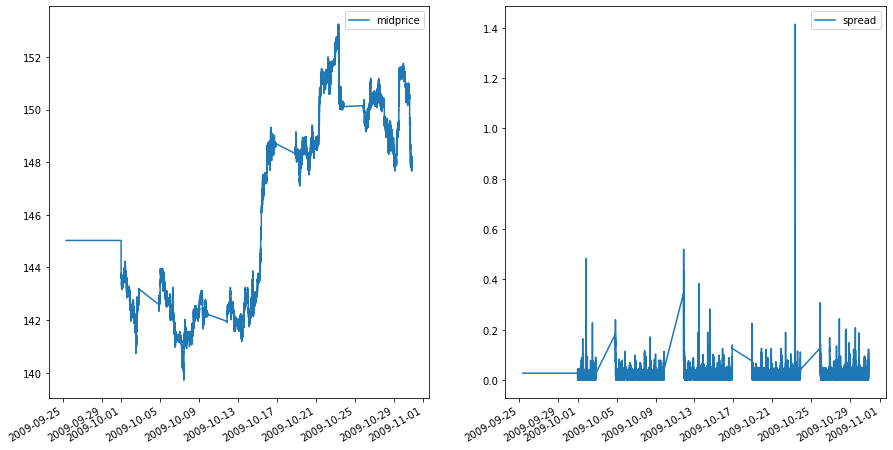

In [5]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 8))
ax[0].plot(df[['ask', 'bid']].mean(axis=1), label='midprice')
ax[1].plot(df['ask'] - df['bid'], label='spread')
ax[0].legend()
ax[1].legend()
fig.autofmt_xdate()

In [21]:
x = df[['ask', 'bid']].mean(1).resample('1min').last().dropna().values
len(x), x

(31370, array([145.027, 143.861, 143.825, ..., 148.176, 148.194, 148.195]))

In [18]:
%matplotlib inline

import scipy.signal as signal
import pywt
import ssqueezepy as spy

In [19]:
def viz(x, Tx, Wx):
    plt.plot(x);  plt.show()    
    plt.imshow(np.abs(Wx), aspect='auto', cmap='jet')
    plt.show()
    plt.imshow(np.flipud(np.abs(Tx)), aspect='auto', vmin=0, vmax=.2, cmap='jet')
    plt.show() 

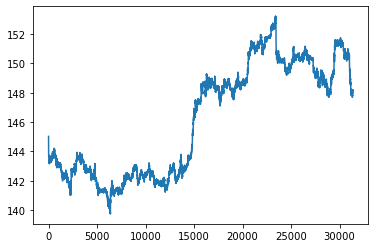

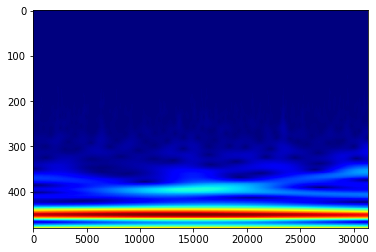

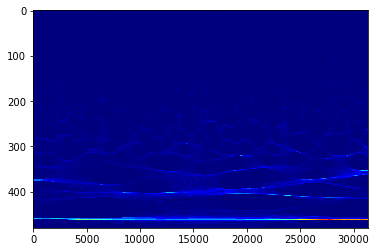

In [25]:
Tx, _, Wx, *_ = spy.ssq_cwt(x, 'morlet')
viz(x, Tx, Wx)


In [45]:
import math

def plot_sections(sections):
    cols = min(6, len(sections))
    rows = math.ceil(len(sections) / cols)
    fig, axes = plt.subplots(rows, cols, figsize = (20, 12))
    for x, ax in zip(sections, axes.flatten()):
        Tx, _, Wx, *_ = spy.ssq_cwt(x, 'cmhat')
        ax.imshow(np.abs(Wx), aspect='auto', cmap='jet')
#         ax.imshow(np.flipud(np.abs(Tx)), aspect='auto', vmin=0, vmax=.2, cmap='jet')
    for ax in axes.flatten()[len(sections):]:
        fig.delaxes(ax)


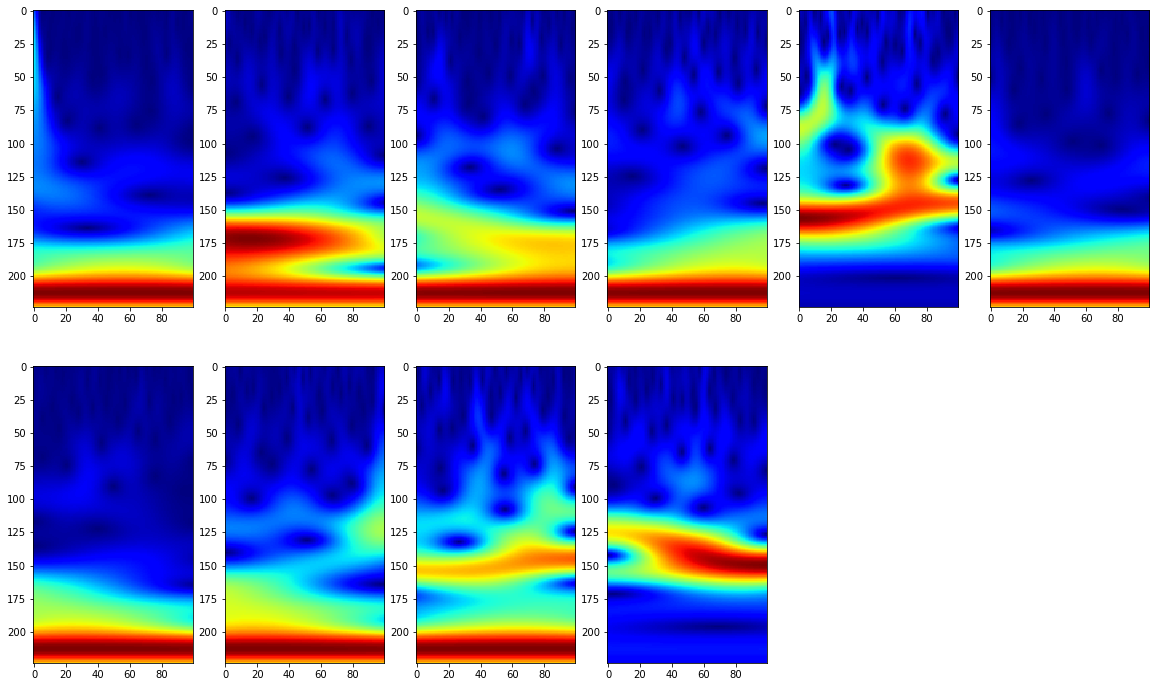

In [46]:
sections = [x[i: i+100] for i in range(0, 1000, 100)]
plot_sections(sections)

In [47]:
import librosa